In [1]:
# !pip install git+https://github.com/autonomio/talos@daily-dev

In [46]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import math
import talos as ta

from talos.model.early_stopper import early_stopper

from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.layers import LSTM, Input, Dense
from keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.activations import relu, elu

from deap import base, creator, tools, algorithms
from scipy.stats import bernoulli
from sklearn.model_selection import train_test_split as split
from bitstring import BitArray


In [47]:
# load the dataset
dataframe = pandas.read_csv('IBM.1Min.TradesOnly.20160128.csv', usecols=[6], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
dataframe.head(5)

,LastTradePrice
0,121.95
1,121.78
2,120.88
3,120.88
4,120.88


In [48]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [49]:
dataset.shape

(409, 1)

In [50]:
# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [51]:
train.shape, test.shape

((286, 1), (123, 1))

In [52]:
 #convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [53]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
#plt.plot(train)


In [54]:
trainY.shape, testY.shape

((284,), (121,))

In [55]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))




In [56]:
# Segment the train_data based on new window_size; split into train and validation (80/20)
X_train, X_val, y_train, y_val = split(trainX, trainY, test_size = 0.20, random_state = 1120)

In [57]:
# reshape into column arrays
y_train = np.reshape(y_train, (y_train.shape[0], 1))
y_val = np.reshape(y_val, (y_val.shape[0], 1))
testY=np.reshape(testY, (testY.shape[0], 1))

In [58]:
trainX.shape, testX.shape

((284, 1, 1), (121, 1, 1))

In [59]:
X_train.shape

(227, 1, 1)

In [60]:
y_train.shape, y_val.shape

((227, 1), (57, 1))

In [61]:
## Declare params for talos
p = {
    'first_neuron': [12, 24, 48],
    'last_activation': [relu, elu],
    'batch_size': [10, 20, 30],
    'epochs' : [100,200,300]
}

In [18]:
## Talos for optimizing
# create and fit the LSTM network
def talos_model(trainX, trainY, x_val, y_val, params):
    model = Sequential()
    model.add(LSTM(params['first_neuron'], input_shape=(1, look_back)))
    model.add(Dense(1,activation=params['last_activation']))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['acc'])
    out=model.fit(trainX, trainY, epochs=params['epochs'], batch_size=params['batch_size'], verbose=2,validation_data=[x_val, y_val])                    
    return out, model
    

In [19]:

h = ta.Scan(X_train, y_train, params= p, model=talos_model, x_val=X_val, y_val=y_val)

  0%|          | 0/54 [00:00<?, ?it/s]

Train on 227 samples, validate on 57 samples
Epoch 1/300
 - 2s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 2/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 3/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 4/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 5/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 6/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 7/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 8/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 9/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 10/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 11/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_a

Epoch 93/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 94/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 95/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 96/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 97/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 98/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 99/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 100/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 101/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 102/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 103/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 104/300
 - 

 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 185/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 186/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 187/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 188/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 189/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 190/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 191/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 192/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 193/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 194/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 195/300
 - 0s - lo

Epoch 276/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 277/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 278/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 279/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 280/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 281/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 282/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 283/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 284/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 285/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 286/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 287/

  2%|▏         | 1/54 [00:18<15:57, 18.07s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/300
 - 2s - loss: 0.2434 - acc: 0.0132 - val_loss: 0.2473 - val_acc: 0.0000e+00
Epoch 2/300
 - 0s - loss: 0.2034 - acc: 0.0132 - val_loss: 0.2051 - val_acc: 0.0000e+00
Epoch 3/300
 - 0s - loss: 0.1670 - acc: 0.0132 - val_loss: 0.1681 - val_acc: 0.0000e+00
Epoch 4/300
 - 0s - loss: 0.1355 - acc: 0.0132 - val_loss: 0.1348 - val_acc: 0.0000e+00
Epoch 5/300
 - 0s - loss: 0.1072 - acc: 0.0132 - val_loss: 0.1054 - val_acc: 0.0000e+00
Epoch 6/300
 - 0s - loss: 0.0836 - acc: 0.0132 - val_loss: 0.0799 - val_acc: 0.0000e+00
Epoch 7/300
 - 0s - loss: 0.0631 - acc: 0.0132 - val_loss: 0.0597 - val_acc: 0.0000e+00
Epoch 8/300
 - 0s - loss: 0.0480 - acc: 0.0132 - val_loss: 0.0436 - val_acc: 0.0000e+00
Epoch 9/300
 - 0s - loss: 0.0363 - acc: 0.0132 - val_loss: 0.0326 - val_acc: 0.0000e+00
Epoch 10/300
 - 0s - loss: 0.0291 - acc: 0.0132 - val_loss: 0.0249 - val_acc: 0.0000e+00
Epoch 11/300
 - 0s - loss: 0.0244 - acc: 0.0132 - val_loss: 0.0202 - val_a

Epoch 93/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 94/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 95/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 96/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 97/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 98/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 99/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 100/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 101/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 102/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 103/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 104/300
 - 

 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 185/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 186/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 187/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 188/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 189/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 190/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 191/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 192/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 193/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 194/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 195/300
 - 0s - lo

Epoch 276/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 277/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 278/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 279/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 280/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 281/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 282/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 283/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 284/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 285/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 286/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 287/

  4%|▎         | 2/54 [00:40<16:50, 19.43s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/200
 - 2s - loss: 0.2710 - acc: 0.0132 - val_loss: 0.2762 - val_acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 0.2288 - acc: 0.0132 - val_loss: 0.2328 - val_acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 0.1919 - acc: 0.0132 - val_loss: 0.1926 - val_acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 0.1569 - acc: 0.0132 - val_loss: 0.1577 - val_acc: 0.0000e+00
Epoch 5/200
 - 0s - loss: 0.1269 - acc: 0.0132 - val_loss: 0.1261 - val_acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 0.1004 - acc: 0.0132 - val_loss: 0.0986 - val_acc: 0.0000e+00
Epoch 7/200
 - 0s - loss: 0.0783 - acc: 0.0132 - val_loss: 0.0750 - val_acc: 0.0000e+00
Epoch 8/200
 - 0s - loss: 0.0606 - acc: 0.0132 - val_loss: 0.0558 - val_acc: 0.0000e+00
Epoch 9/200
 - 0s - loss: 0.0462 - acc: 0.0132 - val_loss: 0.0424 - val_acc: 0.0000e+00
Epoch 10/200
 - 0s - loss: 0.0368 - acc: 0.0132 - val_loss: 0.0326 - val_acc: 0.0000e+00
Epoch 11/200
 - 0s - loss: 0.0307 - acc: 0.0132 - val_loss: 0.0258 - val_a

Epoch 93/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 94/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 95/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 96/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 97/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 98/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 99/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 100/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 101/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 102/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 103/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 104/200
 - 

 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 185/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 186/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 187/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 188/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 189/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 190/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 191/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 192/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 193/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 194/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 195/200
 - 0s - lo

  6%|▌         | 3/54 [00:55<15:19, 18.04s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/100
 - 2s - loss: 0.2502 - acc: 0.0132 - val_loss: 0.2595 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.2180 - acc: 0.0132 - val_loss: 0.2248 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.1873 - acc: 0.0132 - val_loss: 0.1921 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.1585 - acc: 0.0132 - val_loss: 0.1611 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.1318 - acc: 0.0132 - val_loss: 0.1315 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.1061 - acc: 0.0132 - val_loss: 0.1048 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.0832 - acc: 0.0132 - val_loss: 0.0802 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 0.0638 - acc: 0.0132 - val_loss: 0.0591 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 0.0477 - acc: 0.0132 - val_loss: 0.0428 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 0.0361 - acc: 0.0132 - val_loss: 0.0314 - val_acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 0.0290 - acc: 0.0132 - val_loss: 0.0238 - val_a

Epoch 93/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 94/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 95/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 96/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 97/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 98/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 99/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 100/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00


  7%|▋         | 4/54 [01:04<12:53, 15.47s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/200
 - 2s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 5/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 7/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 8/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 9/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 10/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 11/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_a

Epoch 93/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 94/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 95/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 96/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 97/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 98/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 99/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 100/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 101/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 102/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 103/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 104/200
 - 

 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 185/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 186/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 187/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 188/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 189/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 190/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 191/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 192/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 193/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 194/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 195/200
 - 0s - lo

  9%|▉         | 5/54 [01:16<11:37, 14.23s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/100
 - 2s - loss: 0.2390 - acc: 0.0132 - val_loss: 0.2475 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.2069 - acc: 0.0132 - val_loss: 0.2137 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.1777 - acc: 0.0132 - val_loss: 0.1831 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.1515 - acc: 0.0132 - val_loss: 0.1551 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.1276 - acc: 0.0132 - val_loss: 0.1308 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.1073 - acc: 0.0132 - val_loss: 0.1088 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.0891 - acc: 0.0132 - val_loss: 0.0902 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 0.0740 - acc: 0.0132 - val_loss: 0.0741 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 0.0610 - acc: 0.0132 - val_loss: 0.0602 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 0.0503 - acc: 0.0132 - val_loss: 0.0488 - val_acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 0.0418 - acc: 0.0132 - val_loss: 0.0398 - val_a

Epoch 93/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 94/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 95/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 96/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 97/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 98/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 99/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 100/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00


 11%|█         | 6/54 [01:26<10:21, 12.94s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/200
 - 2s - loss: 0.2311 - acc: 0.0132 - val_loss: 0.2349 - val_acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 0.1935 - acc: 0.0132 - val_loss: 0.1955 - val_acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 0.1593 - acc: 0.0132 - val_loss: 0.1599 - val_acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 0.1288 - acc: 0.0132 - val_loss: 0.1281 - val_acc: 0.0000e+00
Epoch 5/200
 - 0s - loss: 0.1020 - acc: 0.0132 - val_loss: 0.1000 - val_acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 0.0789 - acc: 0.0132 - val_loss: 0.0765 - val_acc: 0.0000e+00
Epoch 7/200
 - 0s - loss: 0.0600 - acc: 0.0132 - val_loss: 0.0566 - val_acc: 0.0000e+00
Epoch 8/200
 - 0s - loss: 0.0457 - acc: 0.0132 - val_loss: 0.0414 - val_acc: 0.0000e+00
Epoch 9/200
 - 0s - loss: 0.0349 - acc: 0.0132 - val_loss: 0.0306 - val_acc: 0.0000e+00
Epoch 10/200
 - 0s - loss: 0.0275 - acc: 0.0132 - val_loss: 0.0238 - val_acc: 0.0000e+00
Epoch 11/200
 - 0s - loss: 0.0236 - acc: 0.0132 - val_loss: 0.0192 - val_a

Epoch 93/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 94/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 95/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 96/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 97/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 98/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 99/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 100/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 101/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 102/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 103/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 104/200
 - 

 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 185/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 186/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 187/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 188/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 189/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 190/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 191/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 192/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 193/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 194/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 195/200
 - 0s - lo

 13%|█▎        | 7/54 [01:40<10:32, 13.45s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/200
 - 2s - loss: 0.2531 - acc: 0.0132 - val_loss: 0.2606 - val_acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 0.2190 - acc: 0.0132 - val_loss: 0.2249 - val_acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 0.1874 - acc: 0.0132 - val_loss: 0.1917 - val_acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 0.1579 - acc: 0.0132 - val_loss: 0.1607 - val_acc: 0.0000e+00
Epoch 5/200
 - 0s - loss: 0.1312 - acc: 0.0132 - val_loss: 0.1319 - val_acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 0.1069 - acc: 0.0132 - val_loss: 0.1058 - val_acc: 0.0000e+00
Epoch 7/200
 - 0s - loss: 0.0849 - acc: 0.0132 - val_loss: 0.0829 - val_acc: 0.0000e+00
Epoch 8/200
 - 0s - loss: 0.0665 - acc: 0.0132 - val_loss: 0.0633 - val_acc: 0.0000e+00
Epoch 9/200
 - 0s - loss: 0.0515 - acc: 0.0132 - val_loss: 0.0473 - val_acc: 0.0000e+00
Epoch 10/200
 - 0s - loss: 0.0393 - acc: 0.0132 - val_loss: 0.0356 - val_acc: 0.0000e+00
Epoch 11/200
 - 0s - loss: 0.0313 - acc: 0.0132 - val_loss: 0.0271 - val_a

Epoch 93/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 94/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 95/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 96/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 97/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 98/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 99/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 100/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 101/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 102/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 103/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 104/200
 - 

 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 185/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 186/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 187/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 188/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 189/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 190/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 191/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 192/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 193/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 194/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 195/200
 - 0s - lo

 15%|█▍        | 8/54 [01:54<10:17, 13.43s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/100
 - 2s - loss: 0.2664 - acc: 0.0132 - val_loss: 0.2731 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.2288 - acc: 0.0132 - val_loss: 0.2343 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.1947 - acc: 0.0132 - val_loss: 0.1984 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.1642 - acc: 0.0132 - val_loss: 0.1654 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.1351 - acc: 0.0132 - val_loss: 0.1365 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.1104 - acc: 0.0132 - val_loss: 0.1100 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.0883 - acc: 0.0132 - val_loss: 0.0870 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 0.0700 - acc: 0.0132 - val_loss: 0.0669 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 0.0542 - acc: 0.0132 - val_loss: 0.0510 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 0.0426 - acc: 0.0132 - val_loss: 0.0385 - val_acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 0.0337 - acc: 0.0132 - val_loss: 0.0297 - val_a

Epoch 93/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 94/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 95/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 96/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 97/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 98/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 99/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 100/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00


 17%|█▋        | 9/54 [02:02<09:00, 12.01s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/200
 - 1s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 5/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 7/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 8/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 9/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 10/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 11/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_a

Epoch 93/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 94/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 95/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 96/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 97/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 98/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 99/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 100/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 101/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 102/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 103/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 104/200
 - 

 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 185/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 186/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 187/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 188/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 189/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 190/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 191/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 192/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 193/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 194/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 195/200
 - 0s - lo

 19%|█▊        | 10/54 [37:22<7:52:26, 644.24s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/100
 - 2s - loss: 0.2576 - acc: 0.0132 - val_loss: 0.2598 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.2133 - acc: 0.0132 - val_loss: 0.2138 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.1737 - acc: 0.0132 - val_loss: 0.1710 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.1358 - acc: 0.0132 - val_loss: 0.1319 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.1031 - acc: 0.0132 - val_loss: 0.0963 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.0739 - acc: 0.0132 - val_loss: 0.0665 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.0510 - acc: 0.0132 - val_loss: 0.0435 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 0.0354 - acc: 0.0132 - val_loss: 0.0284 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 0.0266 - acc: 0.0132 - val_loss: 0.0202 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 0.0223 - acc: 0.0132 - val_loss: 0.0169 - val_acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 0.0210 - acc: 0.0132 - val_loss: 0.0153 - val_a

Epoch 93/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 94/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 95/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 96/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 97/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 98/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 99/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 100/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00


 20%|██        | 11/54 [1:31:25<17:00:22, 1423.79s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/300
 - 2s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 2/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 3/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 4/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 5/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 6/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 7/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 8/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 9/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 10/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 11/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_a

Epoch 93/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 94/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 95/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 96/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 97/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 98/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 99/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 100/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 101/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 102/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 103/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 104/300
 - 

Epoch 185/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 186/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 187/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 188/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 189/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 190/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 191/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 192/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 193/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 194/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 195/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 196/

 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 277/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 278/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 279/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 280/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 281/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 282/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 283/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 284/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 285/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 286/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 287/300
 - 0s - lo

 22%|██▏       | 12/54 [2:25:34<23:00:04, 1971.53s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/100
 - 2204s - loss: 0.2322 - acc: 0.0132 - val_loss: 0.2152 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.1590 - acc: 0.0132 - val_loss: 0.1430 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.1006 - acc: 0.0132 - val_loss: 0.0858 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.0598 - acc: 0.0132 - val_loss: 0.0464 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.0350 - acc: 0.0132 - val_loss: 0.0273 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.0249 - acc: 0.0132 - val_loss: 0.0192 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.0221 - acc: 0.0132 - val_loss: 0.0160 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 0.0208 - acc: 0.0132 - val_loss: 0.0152 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 0.0199 - acc: 0.0132 - val_loss: 0.0144 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 0.0189 - acc: 0.0132 - val_loss: 0.0135 - val_acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 0.0180 - acc: 0.0132 - val_loss: 0.0128 - va

Epoch 93/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 94/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 95/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 96/100
 - 107s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 97/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 98/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 99/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 100/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00


 24%|██▍       | 13/54 [3:04:20<23:39:46, 2077.71s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/100
 - 4s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_a

Epoch 93/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 94/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 95/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 96/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 97/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 98/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 99/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 100/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00


 26%|██▌       | 14/54 [3:04:35<16:12:41, 1459.03s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/100
 - 2s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_a

Epoch 93/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 94/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 95/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 96/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 97/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 98/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 99/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 100/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00


 28%|██▊       | 15/54 [3:04:44<11:05:35, 1023.98s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/200
 - 2s - loss: 0.2498 - acc: 0.0132 - val_loss: 0.2471 - val_acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 0.1954 - acc: 0.0132 - val_loss: 0.1911 - val_acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 0.1477 - acc: 0.0132 - val_loss: 0.1414 - val_acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 0.1068 - acc: 0.0132 - val_loss: 0.0986 - val_acc: 0.0000e+00
Epoch 5/200
 - 0s - loss: 0.0735 - acc: 0.0132 - val_loss: 0.0656 - val_acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 0.0498 - acc: 0.0132 - val_loss: 0.0426 - val_acc: 0.0000e+00
Epoch 7/200
 - 0s - loss: 0.0355 - acc: 0.0132 - val_loss: 0.0288 - val_acc: 0.0000e+00
Epoch 8/200
 - 0s - loss: 0.0281 - acc: 0.0132 - val_loss: 0.0226 - val_acc: 0.0000e+00
Epoch 9/200
 - 0s - loss: 0.0255 - acc: 0.0132 - val_loss: 0.0193 - val_acc: 0.0000e+00
Epoch 10/200
 - 0s - loss: 0.0241 - acc: 0.0132 - val_loss: 0.0180 - val_acc: 0.0000e+00
Epoch 11/200
 - 0s - loss: 0.0232 - acc: 0.0132 - val_loss: 0.0174 - val_a

Epoch 93/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 94/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 95/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 96/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 97/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 98/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 99/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 100/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 101/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 102/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 103/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 104/200
 - 

 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 185/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 186/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 187/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 188/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 189/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 190/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 191/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 192/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 193/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 194/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 195/200
 - 0s - lo

 30%|██▉       | 16/54 [3:05:08<7:38:32, 724.01s/it]  

Train on 227 samples, validate on 57 samples
Epoch 1/300
 - 2s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 2/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 3/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 4/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 5/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 6/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 7/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 8/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 9/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 10/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 11/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_a

Epoch 93/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 94/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 95/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 96/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 97/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 98/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 99/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 100/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 101/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 102/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 103/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 104/300
 - 

 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 185/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 186/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 187/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 188/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 189/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 190/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 191/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 192/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 193/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 194/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 195/300
 - 0s - lo

Epoch 276/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 277/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 278/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 279/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 280/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 281/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 282/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 283/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 284/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 285/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 286/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 287/

 31%|███▏      | 17/54 [3:05:43<5:18:56, 517.20s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/100
 - 2s - loss: 0.2437 - acc: 0.0132 - val_loss: 0.2377 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.1856 - acc: 0.0132 - val_loss: 0.1795 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.1374 - acc: 0.0132 - val_loss: 0.1297 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.0982 - acc: 0.0132 - val_loss: 0.0899 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.0680 - acc: 0.0132 - val_loss: 0.0609 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.0467 - acc: 0.0132 - val_loss: 0.0418 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.0345 - acc: 0.0132 - val_loss: 0.0285 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 0.0269 - acc: 0.0132 - val_loss: 0.0221 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 0.0237 - acc: 0.0132 - val_loss: 0.0186 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 0.0220 - acc: 0.0132 - val_loss: 0.0168 - val_acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 0.0211 - acc: 0.0132 - val_loss: 0.0158 - val_a

Epoch 93/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 94/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 95/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 96/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 97/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 98/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 99/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 100/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00


 33%|███▎      | 18/54 [3:05:57<3:39:53, 366.48s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/100
 - 2s - loss: 0.2187 - acc: 0.0132 - val_loss: 0.2275 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.1912 - acc: 0.0132 - val_loss: 0.1979 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.1655 - acc: 0.0132 - val_loss: 0.1703 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.1412 - acc: 0.0132 - val_loss: 0.1450 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.1197 - acc: 0.0132 - val_loss: 0.1214 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.0996 - acc: 0.0132 - val_loss: 0.1005 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.0819 - acc: 0.0132 - val_loss: 0.0820 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 0.0668 - acc: 0.0132 - val_loss: 0.0658 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 0.0536 - acc: 0.0132 - val_loss: 0.0523 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 0.0432 - acc: 0.0132 - val_loss: 0.0412 - val_acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 0.0349 - acc: 0.0132 - val_loss: 0.0325 - val_a

Epoch 93/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 94/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 95/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 96/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 97/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 98/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 99/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 100/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00


 35%|███▌      | 19/54 [3:06:05<2:30:58, 258.83s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/200
 - 2s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 5/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 7/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 8/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 9/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 10/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 11/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_a

Epoch 93/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 94/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 95/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 96/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 97/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 98/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 99/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 100/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 101/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 102/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 103/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 104/200
 - 

 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 185/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 186/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 187/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 188/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 189/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 190/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 191/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 192/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 193/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 194/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 195/200
 - 0s - lo

 37%|███▋      | 20/54 [3:06:16<1:44:35, 184.58s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/100
 - 2s - loss: 0.2180 - acc: 0.0132 - val_loss: 0.2032 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.1523 - acc: 0.0132 - val_loss: 0.1392 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.1010 - acc: 0.0132 - val_loss: 0.0880 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.0620 - acc: 0.0132 - val_loss: 0.0522 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.0378 - acc: 0.0132 - val_loss: 0.0297 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.0251 - acc: 0.0132 - val_loss: 0.0193 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.0205 - acc: 0.0132 - val_loss: 0.0154 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 0.0189 - acc: 0.0132 - val_loss: 0.0137 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 0.0181 - acc: 0.0132 - val_loss: 0.0130 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 0.0173 - acc: 0.0132 - val_loss: 0.0124 - val_acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 0.0165 - acc: 0.0132 - val_loss: 0.0117 - val_a

Epoch 93/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 94/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 95/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 96/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 97/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 98/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 99/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 100/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00


 39%|███▉      | 21/54 [3:06:30<1:13:16, 133.22s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/200
 - 2s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 5/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 7/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 8/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 9/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 10/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 11/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_a

Epoch 93/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 94/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 95/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 96/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 97/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 98/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 99/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 100/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 101/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 102/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 103/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 104/200
 - 

 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 185/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 186/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 187/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 188/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 189/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 190/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 191/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 192/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 193/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 194/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 195/200
 - 0s - lo

 41%|████      | 22/54 [3:06:53<53:25, 100.18s/it]  

Train on 227 samples, validate on 57 samples
Epoch 1/300
 - 2s - loss: 0.2590 - acc: 0.0132 - val_loss: 0.2689 - val_acc: 0.0000e+00
Epoch 2/300
 - 0s - loss: 0.2267 - acc: 0.0132 - val_loss: 0.2353 - val_acc: 0.0000e+00
Epoch 3/300
 - 0s - loss: 0.1973 - acc: 0.0132 - val_loss: 0.2035 - val_acc: 0.0000e+00
Epoch 4/300
 - 0s - loss: 0.1695 - acc: 0.0132 - val_loss: 0.1735 - val_acc: 0.0000e+00
Epoch 5/300
 - 0s - loss: 0.1431 - acc: 0.0132 - val_loss: 0.1454 - val_acc: 0.0000e+00
Epoch 6/300
 - 0s - loss: 0.1189 - acc: 0.0132 - val_loss: 0.1192 - val_acc: 0.0000e+00
Epoch 7/300
 - 0s - loss: 0.0964 - acc: 0.0132 - val_loss: 0.0953 - val_acc: 0.0000e+00
Epoch 8/300
 - 0s - loss: 0.0770 - acc: 0.0132 - val_loss: 0.0739 - val_acc: 0.0000e+00
Epoch 9/300
 - 0s - loss: 0.0601 - acc: 0.0132 - val_loss: 0.0559 - val_acc: 0.0000e+00
Epoch 10/300
 - 0s - loss: 0.0461 - acc: 0.0132 - val_loss: 0.0419 - val_acc: 0.0000e+00
Epoch 11/300
 - 0s - loss: 0.0362 - acc: 0.0132 - val_loss: 0.0315 - val_a

Epoch 93/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 94/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 95/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 96/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 97/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 98/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 99/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 100/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 101/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 102/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 103/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 104/300
 - 

 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 185/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 186/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 187/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 188/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 189/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 190/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 191/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 192/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 193/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 194/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 195/300
 - 0s - lo

Epoch 276/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 277/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 278/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 279/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 280/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 281/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 282/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 283/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 284/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 285/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 286/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 287/

 43%|████▎     | 23/54 [3:07:08<38:32, 74.59s/it] 

Train on 227 samples, validate on 57 samples
Epoch 1/300
 - 2s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 2/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 3/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 4/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 5/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 6/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 7/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 8/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 9/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 10/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 11/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_a

Epoch 93/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 94/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 95/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 96/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 97/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 98/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 99/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 100/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 101/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 102/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 103/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 104/300
 - 

 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 185/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 186/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 187/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 188/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 189/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 190/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 191/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 192/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 193/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 194/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 195/300
 - 0s - lo

Epoch 276/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 277/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 278/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 279/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 280/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 281/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 282/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 283/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 284/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 285/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 286/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 287/

 44%|████▍     | 24/54 [3:07:40<30:57, 61.91s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/300
 - 2s - loss: 0.2789 - acc: 0.0132 - val_loss: 0.2981 - val_acc: 0.0000e+00
Epoch 2/300
 - 0s - loss: 0.2582 - acc: 0.0132 - val_loss: 0.2761 - val_acc: 0.0000e+00
Epoch 3/300
 - 0s - loss: 0.2381 - acc: 0.0132 - val_loss: 0.2548 - val_acc: 0.0000e+00
Epoch 4/300
 - 0s - loss: 0.2194 - acc: 0.0132 - val_loss: 0.2341 - val_acc: 0.0000e+00
Epoch 5/300
 - 0s - loss: 0.2012 - acc: 0.0132 - val_loss: 0.2146 - val_acc: 0.0000e+00
Epoch 6/300
 - 0s - loss: 0.1840 - acc: 0.0132 - val_loss: 0.1959 - val_acc: 0.0000e+00
Epoch 7/300
 - 0s - loss: 0.1670 - acc: 0.0132 - val_loss: 0.1784 - val_acc: 0.0000e+00
Epoch 8/300
 - 0s - loss: 0.1518 - acc: 0.0132 - val_loss: 0.1614 - val_acc: 0.0000e+00
Epoch 9/300
 - 0s - loss: 0.1370 - acc: 0.0132 - val_loss: 0.1453 - val_acc: 0.0000e+00
Epoch 10/300
 - 0s - loss: 0.1230 - acc: 0.0132 - val_loss: 0.1301 - val_acc: 0.0000e+00
Epoch 11/300
 - 0s - loss: 0.1099 - acc: 0.0132 - val_loss: 0.1157 - val_a

Epoch 93/300
 - 0s - loss: 0.0064 - acc: 0.0132 - val_loss: 0.0039 - val_acc: 0.0000e+00
Epoch 94/300
 - 0s - loss: 0.0063 - acc: 0.0132 - val_loss: 0.0037 - val_acc: 0.0000e+00
Epoch 95/300
 - 0s - loss: 0.0062 - acc: 0.0132 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 96/300
 - 0s - loss: 0.0060 - acc: 0.0132 - val_loss: 0.0035 - val_acc: 0.0000e+00
Epoch 97/300
 - 0s - loss: 0.0059 - acc: 0.0132 - val_loss: 0.0035 - val_acc: 0.0000e+00
Epoch 98/300
 - 0s - loss: 0.0059 - acc: 0.0132 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 99/300
 - 0s - loss: 0.0058 - acc: 0.0132 - val_loss: 0.0033 - val_acc: 0.0000e+00
Epoch 100/300
 - 0s - loss: 0.0057 - acc: 0.0132 - val_loss: 0.0033 - val_acc: 0.0000e+00
Epoch 101/300
 - 0s - loss: 0.0056 - acc: 0.0132 - val_loss: 0.0033 - val_acc: 0.0000e+00
Epoch 102/300
 - 0s - loss: 0.0055 - acc: 0.0132 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 103/300
 - 0s - loss: 0.0055 - acc: 0.0132 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 104/300
 - 

 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 185/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 186/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 187/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 188/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 189/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 190/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 191/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 192/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 193/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 194/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 195/300
 - 0s - lo

Epoch 276/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 277/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 278/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 279/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 280/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 281/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 282/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 283/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 284/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 285/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 286/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 287/

 46%|████▋     | 25/54 [3:07:57<23:19, 48.27s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/100
 - 3s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_a

Epoch 93/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 94/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 95/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 96/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 97/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 98/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 99/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 100/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00


 48%|████▊     | 26/54 [3:08:12<17:54, 38.38s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/200
 - 2s - loss: 0.2461 - acc: 0.0132 - val_loss: 0.2418 - val_acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 0.1946 - acc: 0.0132 - val_loss: 0.1875 - val_acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 0.1480 - acc: 0.0132 - val_loss: 0.1397 - val_acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 0.1075 - acc: 0.0132 - val_loss: 0.0989 - val_acc: 0.0000e+00
Epoch 5/200
 - 0s - loss: 0.0751 - acc: 0.0132 - val_loss: 0.0657 - val_acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 0.0503 - acc: 0.0132 - val_loss: 0.0421 - val_acc: 0.0000e+00
Epoch 7/200
 - 0s - loss: 0.0341 - acc: 0.0132 - val_loss: 0.0275 - val_acc: 0.0000e+00
Epoch 8/200
 - 0s - loss: 0.0255 - acc: 0.0132 - val_loss: 0.0199 - val_acc: 0.0000e+00
Epoch 9/200
 - 0s - loss: 0.0220 - acc: 0.0132 - val_loss: 0.0163 - val_acc: 0.0000e+00
Epoch 10/200
 - 0s - loss: 0.0207 - acc: 0.0132 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 11/200
 - 0s - loss: 0.0200 - acc: 0.0132 - val_loss: 0.0145 - val_a

Epoch 93/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 94/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 95/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 96/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 97/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 98/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 99/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 100/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 101/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 102/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 103/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 104/200
 - 

 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 185/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 186/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 187/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 188/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 189/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 190/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 191/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 192/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 193/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 194/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 195/200
 - 0s - lo

 50%|█████     | 27/54 [3:08:27<14:07, 31.39s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/300
 - 2s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 2/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 3/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 4/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 5/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 6/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 7/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 8/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 9/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 10/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 11/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_a

Epoch 93/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 94/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 95/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 96/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 97/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 98/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 99/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 100/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 101/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 102/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 103/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 104/300
 - 

 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 185/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 186/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 187/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 188/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 189/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 190/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 191/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 192/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 193/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 194/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 195/300
 - 0s - lo

Epoch 276/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 277/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 278/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 279/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 280/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 281/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 282/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 283/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 284/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 285/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 286/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 287/

 52%|█████▏    | 28/54 [3:09:00<13:48, 31.87s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/100
 - 2s - loss: 0.2450 - acc: 0.0132 - val_loss: 0.2527 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.2117 - acc: 0.0132 - val_loss: 0.2172 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.1812 - acc: 0.0132 - val_loss: 0.1841 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.1520 - acc: 0.0132 - val_loss: 0.1535 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.1246 - acc: 0.0132 - val_loss: 0.1257 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.1012 - acc: 0.0132 - val_loss: 0.0997 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.0799 - acc: 0.0132 - val_loss: 0.0770 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 0.0618 - acc: 0.0132 - val_loss: 0.0580 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 0.0467 - acc: 0.0132 - val_loss: 0.0432 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 0.0363 - acc: 0.0132 - val_loss: 0.0319 - val_acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 0.0286 - acc: 0.0132 - val_loss: 0.0242 - val_a

Epoch 93/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 94/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 95/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 96/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 97/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 98/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 99/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 100/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00


 54%|█████▎    | 29/54 [3:09:08<10:17, 24.70s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/300
 - 2s - loss: 0.2648 - acc: 0.0132 - val_loss: 0.2725 - val_acc: 0.0000e+00
Epoch 2/300
 - 0s - loss: 0.2275 - acc: 0.0132 - val_loss: 0.2338 - val_acc: 0.0000e+00
Epoch 3/300
 - 0s - loss: 0.1929 - acc: 0.0132 - val_loss: 0.1959 - val_acc: 0.0000e+00
Epoch 4/300
 - 0s - loss: 0.1597 - acc: 0.0132 - val_loss: 0.1605 - val_acc: 0.0000e+00
Epoch 5/300
 - 0s - loss: 0.1296 - acc: 0.0132 - val_loss: 0.1273 - val_acc: 0.0000e+00
Epoch 6/300
 - 0s - loss: 0.1018 - acc: 0.0132 - val_loss: 0.0980 - val_acc: 0.0000e+00
Epoch 7/300
 - 0s - loss: 0.0771 - acc: 0.0132 - val_loss: 0.0736 - val_acc: 0.0000e+00
Epoch 8/300
 - 0s - loss: 0.0583 - acc: 0.0132 - val_loss: 0.0529 - val_acc: 0.0000e+00
Epoch 9/300
 - 0s - loss: 0.0433 - acc: 0.0132 - val_loss: 0.0381 - val_acc: 0.0000e+00
Epoch 10/300
 - 0s - loss: 0.0337 - acc: 0.0132 - val_loss: 0.0286 - val_acc: 0.0000e+00
Epoch 11/300
 - 0s - loss: 0.0278 - acc: 0.0132 - val_loss: 0.0228 - val_a

Epoch 93/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 94/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 95/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 96/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 97/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 98/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 99/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 100/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 101/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 102/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 103/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 104/300
 - 

 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 185/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 186/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 187/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 188/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 189/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 190/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 191/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 192/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 193/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 194/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 195/300
 - 0s - lo

Epoch 276/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 277/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 278/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 279/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 280/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 281/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 282/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 283/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 284/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 285/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 286/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 287/

 56%|█████▌    | 30/54 [3:09:28<09:22, 23.45s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/300
 - 2s - loss: 0.2481 - acc: 0.0132 - val_loss: 0.2309 - val_acc: 0.0000e+00
Epoch 2/300
 - 0s - loss: 0.1721 - acc: 0.0132 - val_loss: 0.1581 - val_acc: 0.0000e+00
Epoch 3/300
 - 0s - loss: 0.1141 - acc: 0.0132 - val_loss: 0.1007 - val_acc: 0.0000e+00
Epoch 4/300
 - 0s - loss: 0.0717 - acc: 0.0132 - val_loss: 0.0596 - val_acc: 0.0000e+00
Epoch 5/300
 - 0s - loss: 0.0443 - acc: 0.0132 - val_loss: 0.0354 - val_acc: 0.0000e+00
Epoch 6/300
 - 0s - loss: 0.0305 - acc: 0.0132 - val_loss: 0.0237 - val_acc: 0.0000e+00
Epoch 7/300
 - 0s - loss: 0.0246 - acc: 0.0132 - val_loss: 0.0189 - val_acc: 0.0000e+00
Epoch 8/300
 - 0s - loss: 0.0225 - acc: 0.0132 - val_loss: 0.0168 - val_acc: 0.0000e+00
Epoch 9/300
 - 0s - loss: 0.0214 - acc: 0.0132 - val_loss: 0.0157 - val_acc: 0.0000e+00
Epoch 10/300
 - 0s - loss: 0.0205 - acc: 0.0132 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 11/300
 - 0s - loss: 0.0196 - acc: 0.0132 - val_loss: 0.0141 - val_a

Epoch 93/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 94/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 95/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 96/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 97/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 98/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 99/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 100/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 101/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 102/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 103/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 104/300
 - 

 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 185/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 186/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 187/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 188/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 189/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 190/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 191/300
 - 0s - loss: 0.0052 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 192/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 193/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 194/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 195/300
 - 0s - lo

Epoch 276/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 277/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 278/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 279/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 280/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 281/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 282/300
 - 0s - loss: 0.0052 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 283/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 284/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 285/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 286/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 287/

 57%|█████▋    | 31/54 [3:10:02<10:12, 26.62s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/100
 - 2s - loss: 0.2620 - acc: 0.0132 - val_loss: 0.2798 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.2419 - acc: 0.0132 - val_loss: 0.2583 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.2229 - acc: 0.0132 - val_loss: 0.2379 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.2044 - acc: 0.0132 - val_loss: 0.2188 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.1873 - acc: 0.0132 - val_loss: 0.2004 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.1713 - acc: 0.0132 - val_loss: 0.1827 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.1559 - acc: 0.0132 - val_loss: 0.1658 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 0.1410 - acc: 0.0132 - val_loss: 0.1496 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 0.1270 - acc: 0.0132 - val_loss: 0.1343 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 0.1137 - acc: 0.0132 - val_loss: 0.1199 - val_acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 0.1014 - acc: 0.0132 - val_loss: 0.1064 - val_a

Epoch 93/100
 - 0s - loss: 0.0071 - acc: 0.0132 - val_loss: 0.0045 - val_acc: 0.0000e+00
Epoch 94/100
 - 0s - loss: 0.0070 - acc: 0.0132 - val_loss: 0.0043 - val_acc: 0.0000e+00
Epoch 95/100
 - 0s - loss: 0.0069 - acc: 0.0132 - val_loss: 0.0042 - val_acc: 0.0000e+00
Epoch 96/100
 - 0s - loss: 0.0068 - acc: 0.0132 - val_loss: 0.0042 - val_acc: 0.0000e+00
Epoch 97/100
 - 0s - loss: 0.0067 - acc: 0.0132 - val_loss: 0.0041 - val_acc: 0.0000e+00
Epoch 98/100
 - 0s - loss: 0.0066 - acc: 0.0132 - val_loss: 0.0040 - val_acc: 0.0000e+00
Epoch 99/100
 - 0s - loss: 0.0065 - acc: 0.0132 - val_loss: 0.0039 - val_acc: 0.0000e+00
Epoch 100/100
 - 0s - loss: 0.0064 - acc: 0.0132 - val_loss: 0.0038 - val_acc: 0.0000e+00


 59%|█████▉    | 32/54 [3:10:11<07:48, 21.29s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/100
 - 2s - loss: 0.2943 - acc: 0.0132 - val_loss: 0.3157 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.2741 - acc: 0.0132 - val_loss: 0.2940 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.2546 - acc: 0.0132 - val_loss: 0.2734 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.2366 - acc: 0.0132 - val_loss: 0.2537 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.2192 - acc: 0.0132 - val_loss: 0.2352 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.2027 - acc: 0.0132 - val_loss: 0.2174 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.1870 - acc: 0.0132 - val_loss: 0.2005 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 0.1720 - acc: 0.0132 - val_loss: 0.1841 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 0.1575 - acc: 0.0132 - val_loss: 0.1685 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 0.1437 - acc: 0.0132 - val_loss: 0.1535 - val_acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 0.1307 - acc: 0.0132 - val_loss: 0.1389 - val_a

Epoch 93/100
 - 0s - loss: 0.0065 - acc: 0.0132 - val_loss: 0.0039 - val_acc: 0.0000e+00
Epoch 94/100
 - 0s - loss: 0.0063 - acc: 0.0132 - val_loss: 0.0038 - val_acc: 0.0000e+00
Epoch 95/100
 - 0s - loss: 0.0062 - acc: 0.0132 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 96/100
 - 0s - loss: 0.0061 - acc: 0.0132 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 97/100
 - 0s - loss: 0.0060 - acc: 0.0132 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 98/100
 - 0s - loss: 0.0059 - acc: 0.0132 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 99/100
 - 0s - loss: 0.0057 - acc: 0.0132 - val_loss: 0.0033 - val_acc: 0.0000e+00
Epoch 100/100
 - 0s - loss: 0.0057 - acc: 0.0132 - val_loss: 0.0033 - val_acc: 0.0000e+00


 61%|██████    | 33/54 [3:10:19<06:03, 17.32s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/100
 - 2s - loss: 0.2454 - acc: 0.0132 - val_loss: 0.2532 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.2120 - acc: 0.0132 - val_loss: 0.2181 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.1809 - acc: 0.0132 - val_loss: 0.1850 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.1522 - acc: 0.0132 - val_loss: 0.1539 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.1247 - acc: 0.0132 - val_loss: 0.1250 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.1002 - acc: 0.0132 - val_loss: 0.0984 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.0786 - acc: 0.0132 - val_loss: 0.0745 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 0.0592 - acc: 0.0132 - val_loss: 0.0552 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 0.0447 - acc: 0.0132 - val_loss: 0.0400 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 0.0346 - acc: 0.0132 - val_loss: 0.0291 - val_acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 0.0278 - acc: 0.0132 - val_loss: 0.0231 - val_a

Epoch 93/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 94/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 95/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 96/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 97/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 98/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 99/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 100/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00


 63%|██████▎   | 34/54 [3:10:29<04:58, 14.94s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/300
 - 2s - loss: 0.2485 - acc: 0.0132 - val_loss: 0.2269 - val_acc: 0.0000e+00
Epoch 2/300
 - 0s - loss: 0.1632 - acc: 0.0132 - val_loss: 0.1392 - val_acc: 0.0000e+00
Epoch 3/300
 - 0s - loss: 0.0945 - acc: 0.0132 - val_loss: 0.0731 - val_acc: 0.0000e+00
Epoch 4/300
 - 0s - loss: 0.0488 - acc: 0.0132 - val_loss: 0.0346 - val_acc: 0.0000e+00
Epoch 5/300
 - 0s - loss: 0.0278 - acc: 0.0132 - val_loss: 0.0201 - val_acc: 0.0000e+00
Epoch 6/300
 - 0s - loss: 0.0228 - acc: 0.0132 - val_loss: 0.0166 - val_acc: 0.0000e+00
Epoch 7/300
 - 0s - loss: 0.0218 - acc: 0.0088 - val_loss: 0.0154 - val_acc: 0.0000e+00
Epoch 8/300
 - 0s - loss: 0.0205 - acc: 0.0132 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 9/300
 - 0s - loss: 0.0192 - acc: 0.0132 - val_loss: 0.0135 - val_acc: 0.0000e+00
Epoch 10/300
 - 0s - loss: 0.0179 - acc: 0.0132 - val_loss: 0.0128 - val_acc: 0.0000e+00
Epoch 11/300
 - 0s - loss: 0.0167 - acc: 0.0132 - val_loss: 0.0117 - val_a

Epoch 93/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 94/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 95/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 96/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 97/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 98/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 99/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 100/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 101/300
 - 0s - loss: 0.0052 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 102/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 103/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 104/300
 - 

 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 185/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 186/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 187/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 188/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 189/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 190/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 191/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 192/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 193/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 194/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 195/300
 - 0s - lo

Epoch 276/300
 - 0s - loss: 0.0052 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 277/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 278/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 279/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 280/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 281/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 282/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 283/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 284/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 285/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 286/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 287/

 65%|██████▍   | 35/54 [3:11:02<06:30, 20.54s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/300
 - 2s - loss: 0.2647 - acc: 0.0132 - val_loss: 0.2751 - val_acc: 0.0000e+00
Epoch 2/300
 - 0s - loss: 0.2319 - acc: 0.0132 - val_loss: 0.2404 - val_acc: 0.0000e+00
Epoch 3/300
 - 0s - loss: 0.2013 - acc: 0.0132 - val_loss: 0.2088 - val_acc: 0.0000e+00
Epoch 4/300
 - 0s - loss: 0.1740 - acc: 0.0132 - val_loss: 0.1795 - val_acc: 0.0000e+00
Epoch 5/300
 - 0s - loss: 0.1483 - acc: 0.0132 - val_loss: 0.1529 - val_acc: 0.0000e+00
Epoch 6/300
 - 0s - loss: 0.1262 - acc: 0.0132 - val_loss: 0.1281 - val_acc: 0.0000e+00
Epoch 7/300
 - 0s - loss: 0.1052 - acc: 0.0132 - val_loss: 0.1064 - val_acc: 0.0000e+00
Epoch 8/300
 - 0s - loss: 0.0869 - acc: 0.0132 - val_loss: 0.0873 - val_acc: 0.0000e+00
Epoch 9/300
 - 0s - loss: 0.0714 - acc: 0.0132 - val_loss: 0.0704 - val_acc: 0.0000e+00
Epoch 10/300
 - 0s - loss: 0.0583 - acc: 0.0132 - val_loss: 0.0564 - val_acc: 0.0000e+00
Epoch 11/300
 - 0s - loss: 0.0479 - acc: 0.0132 - val_loss: 0.0451 - val_a

Epoch 93/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 94/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 95/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 96/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 97/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 98/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 99/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 100/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 101/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 102/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 103/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 104/300
 - 

 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 185/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 186/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 187/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 188/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 189/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 190/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 191/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 192/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 193/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 194/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 195/300
 - 0s - lo

Epoch 276/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 277/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 278/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 279/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 280/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 281/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 282/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 283/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 284/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 285/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 286/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 287/

 67%|██████▋   | 36/54 [3:11:21<05:59, 19.95s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/200
 - 2s - loss: 0.2249 - acc: 0.0132 - val_loss: 0.2345 - val_acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 0.1977 - acc: 0.0132 - val_loss: 0.2053 - val_acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 0.1722 - acc: 0.0132 - val_loss: 0.1784 - val_acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 0.1488 - acc: 0.0132 - val_loss: 0.1538 - val_acc: 0.0000e+00
Epoch 5/200
 - 0s - loss: 0.1280 - acc: 0.0132 - val_loss: 0.1312 - val_acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 0.1082 - acc: 0.0132 - val_loss: 0.1110 - val_acc: 0.0000e+00
Epoch 7/200
 - 0s - loss: 0.0909 - acc: 0.0132 - val_loss: 0.0928 - val_acc: 0.0000e+00
Epoch 8/200
 - 0s - loss: 0.0760 - acc: 0.0132 - val_loss: 0.0765 - val_acc: 0.0000e+00
Epoch 9/200
 - 0s - loss: 0.0628 - acc: 0.0132 - val_loss: 0.0624 - val_acc: 0.0000e+00
Epoch 10/200
 - 0s - loss: 0.0518 - acc: 0.0132 - val_loss: 0.0503 - val_acc: 0.0000e+00
Epoch 11/200
 - 0s - loss: 0.0423 - acc: 0.0132 - val_loss: 0.0408 - val_a

Epoch 93/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 94/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 95/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 96/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 97/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 98/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 99/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 100/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 101/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 102/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 103/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 104/200
 - 

 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 185/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 186/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 187/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 188/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 189/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 190/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 191/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 192/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 193/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 194/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 195/200
 - 0s - lo

 69%|██████▊   | 37/54 [3:11:33<05:00, 17.70s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/300
 - 2s - loss: 0.2980 - acc: 0.0132 - val_loss: 0.3117 - val_acc: 0.0000e+00
Epoch 2/300
 - 0s - loss: 0.2660 - acc: 0.0132 - val_loss: 0.2784 - val_acc: 0.0000e+00
Epoch 3/300
 - 0s - loss: 0.2361 - acc: 0.0132 - val_loss: 0.2473 - val_acc: 0.0000e+00
Epoch 4/300
 - 0s - loss: 0.2093 - acc: 0.0132 - val_loss: 0.2182 - val_acc: 0.0000e+00
Epoch 5/300
 - 0s - loss: 0.1840 - acc: 0.0132 - val_loss: 0.1916 - val_acc: 0.0000e+00
Epoch 6/300
 - 0s - loss: 0.1610 - acc: 0.0132 - val_loss: 0.1675 - val_acc: 0.0000e+00
Epoch 7/300
 - 0s - loss: 0.1400 - acc: 0.0132 - val_loss: 0.1453 - val_acc: 0.0000e+00
Epoch 8/300
 - 0s - loss: 0.1211 - acc: 0.0132 - val_loss: 0.1249 - val_acc: 0.0000e+00
Epoch 9/300
 - 0s - loss: 0.1036 - acc: 0.0132 - val_loss: 0.1066 - val_acc: 0.0000e+00
Epoch 10/300
 - 0s - loss: 0.0886 - acc: 0.0132 - val_loss: 0.0899 - val_acc: 0.0000e+00
Epoch 11/300
 - 0s - loss: 0.0748 - acc: 0.0132 - val_loss: 0.0754 - val_a

Epoch 93/300
 - 0s - loss: 0.0058 - acc: 0.0132 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 94/300
 - 0s - loss: 0.0058 - acc: 0.0132 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 95/300
 - 0s - loss: 0.0057 - acc: 0.0132 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 96/300
 - 0s - loss: 0.0057 - acc: 0.0132 - val_loss: 0.0033 - val_acc: 0.0000e+00
Epoch 97/300
 - 0s - loss: 0.0056 - acc: 0.0132 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 98/300
 - 0s - loss: 0.0055 - acc: 0.0132 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 99/300
 - 0s - loss: 0.0055 - acc: 0.0132 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 100/300
 - 0s - loss: 0.0055 - acc: 0.0132 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 101/300
 - 0s - loss: 0.0054 - acc: 0.0132 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 102/300
 - 0s - loss: 0.0054 - acc: 0.0132 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 103/300
 - 0s - loss: 0.0054 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 104/300
 - 

Epoch 185/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 186/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 187/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 188/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 189/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 190/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 191/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 192/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 193/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 194/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 195/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 196/

 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 277/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 278/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 279/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 280/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 281/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 282/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 283/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 284/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 285/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 286/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 287/300
 - 0s - lo

 70%|███████   | 38/54 [3:11:47<04:25, 16.59s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/300
 - 1s - loss: 0.2123 - acc: 0.0132 - val_loss: 0.2059 - val_acc: 0.0000e+00
Epoch 2/300
 - 0s - loss: 0.1587 - acc: 0.0132 - val_loss: 0.1509 - val_acc: 0.0000e+00
Epoch 3/300
 - 0s - loss: 0.1137 - acc: 0.0132 - val_loss: 0.1059 - val_acc: 0.0000e+00
Epoch 4/300
 - 0s - loss: 0.0781 - acc: 0.0132 - val_loss: 0.0706 - val_acc: 0.0000e+00
Epoch 5/300
 - 0s - loss: 0.0521 - acc: 0.0132 - val_loss: 0.0452 - val_acc: 0.0000e+00
Epoch 6/300
 - 0s - loss: 0.0351 - acc: 0.0132 - val_loss: 0.0296 - val_acc: 0.0000e+00
Epoch 7/300
 - 0s - loss: 0.0258 - acc: 0.0132 - val_loss: 0.0210 - val_acc: 0.0000e+00
Epoch 8/300
 - 0s - loss: 0.0215 - acc: 0.0132 - val_loss: 0.0170 - val_acc: 0.0000e+00
Epoch 9/300
 - 0s - loss: 0.0198 - acc: 0.0132 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 10/300
 - 0s - loss: 0.0188 - acc: 0.0132 - val_loss: 0.0138 - val_acc: 0.0000e+00
Epoch 11/300
 - 0s - loss: 0.0181 - acc: 0.0132 - val_loss: 0.0131 - val_a

Epoch 93/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 94/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 95/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 96/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 97/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 98/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 99/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 100/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 101/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 102/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 103/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 104/300
 - 

 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 185/300
 - 0s - loss: 0.0052 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 186/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 187/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 188/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 189/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 190/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 191/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 192/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 193/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 194/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 195/300
 - 0s - lo

Epoch 276/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 277/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 278/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 279/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 280/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 281/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 282/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 283/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 284/300
 - 0s - loss: 0.0052 - acc: 0.0132 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 285/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 286/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 287/

 72%|███████▏  | 39/54 [3:12:17<05:09, 20.63s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/300
 - 1s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 2/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 3/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 4/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 5/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 6/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 7/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 8/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 9/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 10/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 11/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_a

Epoch 93/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 94/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 95/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 96/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 97/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 98/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 99/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 100/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 101/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 102/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 103/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 104/300
 - 

 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 185/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 186/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 187/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 188/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 189/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 190/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 191/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 192/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 193/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 194/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 195/300
 - 0s - lo

Epoch 276/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 277/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 278/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 279/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 280/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 281/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 282/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 283/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 284/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 285/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 286/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 287/

 74%|███████▍  | 40/54 [3:12:32<04:22, 18.76s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/200
 - 2s - loss: 0.2092 - acc: 0.0132 - val_loss: 0.2069 - val_acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 0.1647 - acc: 0.0132 - val_loss: 0.1587 - val_acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 0.1241 - acc: 0.0132 - val_loss: 0.1163 - val_acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 0.0884 - acc: 0.0132 - val_loss: 0.0803 - val_acc: 0.0000e+00
Epoch 5/200
 - 0s - loss: 0.0603 - acc: 0.0132 - val_loss: 0.0515 - val_acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 0.0388 - acc: 0.0132 - val_loss: 0.0319 - val_acc: 0.0000e+00
Epoch 7/200
 - 0s - loss: 0.0259 - acc: 0.0132 - val_loss: 0.0205 - val_acc: 0.0000e+00
Epoch 8/200
 - 0s - loss: 0.0199 - acc: 0.0132 - val_loss: 0.0151 - val_acc: 0.0000e+00
Epoch 9/200
 - 0s - loss: 0.0179 - acc: 0.0132 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 10/200
 - 0s - loss: 0.0173 - acc: 0.0132 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 11/200
 - 0s - loss: 0.0168 - acc: 0.0132 - val_loss: 0.0118 - val_a

Epoch 93/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 94/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 95/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 96/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 97/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 98/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 99/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 100/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 101/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 102/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 103/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 104/200
 - 

 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 185/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 186/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 187/200
 - 0s - loss: 0.0052 - acc: 0.0132 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 188/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 189/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 190/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 191/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 192/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 193/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 194/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 195/200
 - 0s - lo

 76%|███████▌  | 41/54 [3:12:46<03:46, 17.40s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/200
 - 2s - loss: 0.2750 - acc: 0.0132 - val_loss: 0.2933 - val_acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 0.2535 - acc: 0.0132 - val_loss: 0.2704 - val_acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 0.2330 - acc: 0.0132 - val_loss: 0.2488 - val_acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 0.2138 - acc: 0.0132 - val_loss: 0.2280 - val_acc: 0.0000e+00
Epoch 5/200
 - 0s - loss: 0.1955 - acc: 0.0132 - val_loss: 0.2083 - val_acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 0.1782 - acc: 0.0132 - val_loss: 0.1898 - val_acc: 0.0000e+00
Epoch 7/200
 - 0s - loss: 0.1620 - acc: 0.0132 - val_loss: 0.1723 - val_acc: 0.0000e+00
Epoch 8/200
 - 0s - loss: 0.1465 - acc: 0.0132 - val_loss: 0.1558 - val_acc: 0.0000e+00
Epoch 9/200
 - 0s - loss: 0.1320 - acc: 0.0132 - val_loss: 0.1402 - val_acc: 0.0000e+00
Epoch 10/200
 - 0s - loss: 0.1187 - acc: 0.0132 - val_loss: 0.1255 - val_acc: 0.0000e+00
Epoch 11/200
 - 0s - loss: 0.1061 - acc: 0.0132 - val_loss: 0.1118 - val_a

Epoch 93/200
 - 0s - loss: 0.0077 - acc: 0.0132 - val_loss: 0.0049 - val_acc: 0.0000e+00
Epoch 94/200
 - 0s - loss: 0.0076 - acc: 0.0132 - val_loss: 0.0048 - val_acc: 0.0000e+00
Epoch 95/200
 - 0s - loss: 0.0074 - acc: 0.0132 - val_loss: 0.0047 - val_acc: 0.0000e+00
Epoch 96/200
 - 0s - loss: 0.0073 - acc: 0.0132 - val_loss: 0.0046 - val_acc: 0.0000e+00
Epoch 97/200
 - 0s - loss: 0.0072 - acc: 0.0132 - val_loss: 0.0045 - val_acc: 0.0000e+00
Epoch 98/200
 - 0s - loss: 0.0071 - acc: 0.0132 - val_loss: 0.0044 - val_acc: 0.0000e+00
Epoch 99/200
 - 0s - loss: 0.0069 - acc: 0.0132 - val_loss: 0.0043 - val_acc: 0.0000e+00
Epoch 100/200
 - 0s - loss: 0.0068 - acc: 0.0132 - val_loss: 0.0043 - val_acc: 0.0000e+00
Epoch 101/200
 - 0s - loss: 0.0067 - acc: 0.0132 - val_loss: 0.0042 - val_acc: 0.0000e+00
Epoch 102/200
 - 0s - loss: 0.0066 - acc: 0.0132 - val_loss: 0.0041 - val_acc: 0.0000e+00
Epoch 103/200
 - 0s - loss: 0.0065 - acc: 0.0132 - val_loss: 0.0040 - val_acc: 0.0000e+00
Epoch 104/200
 - 

 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 185/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 186/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 187/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 188/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 189/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 190/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 191/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 192/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 193/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 194/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 195/200
 - 0s - lo

 78%|███████▊  | 42/54 [3:12:57<03:05, 15.50s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/200
 - 2s - loss: 0.2737 - acc: 0.0132 - val_loss: 0.2858 - val_acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 0.2413 - acc: 0.0132 - val_loss: 0.2518 - val_acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 0.2119 - acc: 0.0132 - val_loss: 0.2200 - val_acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 0.1842 - acc: 0.0132 - val_loss: 0.1909 - val_acc: 0.0000e+00
Epoch 5/200
 - 0s - loss: 0.1592 - acc: 0.0132 - val_loss: 0.1644 - val_acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 0.1363 - acc: 0.0132 - val_loss: 0.1398 - val_acc: 0.0000e+00
Epoch 7/200
 - 0s - loss: 0.1152 - acc: 0.0132 - val_loss: 0.1176 - val_acc: 0.0000e+00
Epoch 8/200
 - 0s - loss: 0.0970 - acc: 0.0132 - val_loss: 0.0976 - val_acc: 0.0000e+00
Epoch 9/200
 - 0s - loss: 0.0802 - acc: 0.0132 - val_loss: 0.0807 - val_acc: 0.0000e+00
Epoch 10/200
 - 0s - loss: 0.0666 - acc: 0.0132 - val_loss: 0.0656 - val_acc: 0.0000e+00
Epoch 11/200
 - 0s - loss: 0.0553 - acc: 0.0132 - val_loss: 0.0528 - val_a

Epoch 93/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 94/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 95/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 96/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 97/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 98/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 99/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 100/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 101/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 102/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 103/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 104/200
 - 

 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 185/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 186/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 187/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 188/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 189/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 190/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 191/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 192/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 193/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 194/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 195/200
 - 0s - lo

 80%|███████▉  | 43/54 [3:13:11<02:44, 14.98s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/300
 - 2s - loss: 0.2860 - acc: 0.0132 - val_loss: 0.2883 - val_acc: 0.0000e+00
Epoch 2/300
 - 0s - loss: 0.2370 - acc: 0.0132 - val_loss: 0.2379 - val_acc: 0.0000e+00
Epoch 3/300
 - 0s - loss: 0.1930 - acc: 0.0132 - val_loss: 0.1915 - val_acc: 0.0000e+00
Epoch 4/300
 - 0s - loss: 0.1534 - acc: 0.0132 - val_loss: 0.1489 - val_acc: 0.0000e+00
Epoch 5/300
 - 0s - loss: 0.1171 - acc: 0.0132 - val_loss: 0.1107 - val_acc: 0.0000e+00
Epoch 6/300
 - 0s - loss: 0.0859 - acc: 0.0132 - val_loss: 0.0777 - val_acc: 0.0000e+00
Epoch 7/300
 - 0s - loss: 0.0605 - acc: 0.0132 - val_loss: 0.0525 - val_acc: 0.0000e+00
Epoch 8/300
 - 0s - loss: 0.0426 - acc: 0.0132 - val_loss: 0.0356 - val_acc: 0.0000e+00
Epoch 9/300
 - 0s - loss: 0.0316 - acc: 0.0132 - val_loss: 0.0257 - val_acc: 0.0000e+00
Epoch 10/300
 - 0s - loss: 0.0264 - acc: 0.0132 - val_loss: 0.0204 - val_acc: 0.0000e+00
Epoch 11/300
 - 0s - loss: 0.0242 - acc: 0.0132 - val_loss: 0.0181 - val_a

Epoch 93/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 94/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 95/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 96/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 97/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 98/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 99/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 100/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 101/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 102/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 103/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 104/300
 - 

 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 185/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 186/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 187/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 188/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 189/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 190/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 191/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 192/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 193/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 194/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 195/300
 - 0s - lo

Epoch 276/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 277/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 278/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 279/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 280/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 281/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 282/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 283/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 284/300
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 285/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 286/300
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 287/

 81%|████████▏ | 44/54 [3:13:30<02:42, 16.28s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/200
 - 2s - loss: 0.1998 - acc: 0.0132 - val_loss: 0.1852 - val_acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 0.1362 - acc: 0.0132 - val_loss: 0.1186 - val_acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 0.0837 - acc: 0.0132 - val_loss: 0.0699 - val_acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 0.0483 - acc: 0.0132 - val_loss: 0.0371 - val_acc: 0.0000e+00
Epoch 5/200
 - 0s - loss: 0.0286 - acc: 0.0132 - val_loss: 0.0212 - val_acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 0.0205 - acc: 0.0132 - val_loss: 0.0154 - val_acc: 0.0000e+00
Epoch 7/200
 - 0s - loss: 0.0183 - acc: 0.0132 - val_loss: 0.0132 - val_acc: 0.0000e+00
Epoch 8/200
 - 0s - loss: 0.0174 - acc: 0.0132 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 9/200
 - 0s - loss: 0.0166 - acc: 0.0132 - val_loss: 0.0117 - val_acc: 0.0000e+00
Epoch 10/200
 - 0s - loss: 0.0158 - acc: 0.0132 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 11/200
 - 0s - loss: 0.0150 - acc: 0.0132 - val_loss: 0.0104 - val_a

Epoch 93/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 94/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 95/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 96/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 97/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 98/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 99/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 100/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 101/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 102/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 103/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 104/200
 - 

 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 185/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 186/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 187/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 188/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 189/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 190/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 191/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 192/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 193/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 194/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 195/200
 - 0s - lo

 83%|████████▎ | 45/54 [3:13:53<02:43, 18.19s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/200
 - 2s - loss: 0.2345 - acc: 0.0132 - val_loss: 0.2079 - val_acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 0.1483 - acc: 0.0132 - val_loss: 0.1220 - val_acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 0.0814 - acc: 0.0132 - val_loss: 0.0619 - val_acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 0.0407 - acc: 0.0132 - val_loss: 0.0293 - val_acc: 0.0000e+00
Epoch 5/200
 - 0s - loss: 0.0250 - acc: 0.0132 - val_loss: 0.0179 - val_acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 0.0220 - acc: 0.0132 - val_loss: 0.0156 - val_acc: 0.0000e+00
Epoch 7/200
 - 0s - loss: 0.0206 - acc: 0.0132 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 8/200
 - 0s - loss: 0.0195 - acc: 0.0132 - val_loss: 0.0138 - val_acc: 0.0000e+00
Epoch 9/200
 - 0s - loss: 0.0184 - acc: 0.0132 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 10/200
 - 0s - loss: 0.0170 - acc: 0.0132 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 11/200
 - 0s - loss: 0.0160 - acc: 0.0132 - val_loss: 0.0111 - val_a

Epoch 93/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 94/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 95/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 96/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 97/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 98/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 99/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 100/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 101/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 102/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 103/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0035 - val_acc: 0.0000e+00
Epoch 104/200
 - 

 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 185/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 186/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 187/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 188/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 189/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 190/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 191/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 192/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 193/200
 - 0s - loss: 0.0052 - acc: 0.0132 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 194/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 195/200
 - 0s - lo

 85%|████████▌ | 46/54 [3:14:20<02:46, 20.79s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/200
 - 2s - loss: 0.2290 - acc: 0.0132 - val_loss: 0.2168 - val_acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 0.1632 - acc: 0.0132 - val_loss: 0.1495 - val_acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 0.1071 - acc: 0.0132 - val_loss: 0.0923 - val_acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 0.0632 - acc: 0.0132 - val_loss: 0.0514 - val_acc: 0.0000e+00
Epoch 5/200
 - 0s - loss: 0.0370 - acc: 0.0132 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 0.0246 - acc: 0.0132 - val_loss: 0.0186 - val_acc: 0.0000e+00
Epoch 7/200
 - 0s - loss: 0.0214 - acc: 0.0132 - val_loss: 0.0155 - val_acc: 0.0000e+00
Epoch 8/200
 - 0s - loss: 0.0202 - acc: 0.0132 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 9/200
 - 0s - loss: 0.0193 - acc: 0.0132 - val_loss: 0.0140 - val_acc: 0.0000e+00
Epoch 10/200
 - 0s - loss: 0.0184 - acc: 0.0132 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 11/200
 - 0s - loss: 0.0176 - acc: 0.0132 - val_loss: 0.0123 - val_a

Epoch 93/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 94/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 95/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 96/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 97/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 98/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 99/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 100/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 101/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 102/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 103/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 104/200
 - 

 - 0s - loss: 0.0052 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 185/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 186/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 187/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 188/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 189/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 190/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 191/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 192/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 193/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 194/200
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 195/200
 - 0s - lo

 87%|████████▋ | 47/54 [3:14:47<02:39, 22.74s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/300
 - 2s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 2/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 3/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 4/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 5/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 6/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 7/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 8/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 9/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 10/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 11/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_a

Epoch 93/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 94/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 95/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 96/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 97/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 98/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 99/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 100/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 101/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 102/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 103/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 104/300
 - 

Epoch 185/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 186/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 187/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 188/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 189/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 190/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 191/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 192/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 193/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 194/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 195/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 196/

 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 277/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 278/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 279/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 280/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 281/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 282/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 283/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 284/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 285/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 286/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 287/300
 - 0s - lo

 89%|████████▉ | 48/54 [3:15:03<02:03, 20.60s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/300
 - 2s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 2/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 3/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 4/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 5/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 6/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 7/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 8/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 9/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 10/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 11/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_a

Epoch 93/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 94/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 95/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 96/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 97/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 98/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 99/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 100/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 101/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 102/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 103/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 104/300
 - 

 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 185/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 186/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 187/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 188/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 189/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 190/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 191/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 192/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 193/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 194/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 195/300
 - 0s - lo

Epoch 276/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 277/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 278/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 279/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 280/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 281/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 282/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 283/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 284/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 285/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 286/300
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 287/

 91%|█████████ | 49/54 [3:15:25<01:46, 21.26s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/100
 - 3s - loss: 0.2182 - acc: 0.0132 - val_loss: 0.1918 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.1324 - acc: 0.0132 - val_loss: 0.1084 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.0691 - acc: 0.0132 - val_loss: 0.0501 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.0334 - acc: 0.0132 - val_loss: 0.0228 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.0229 - acc: 0.0132 - val_loss: 0.0159 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.0204 - acc: 0.0132 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.0193 - acc: 0.0132 - val_loss: 0.0138 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 0.0182 - acc: 0.0132 - val_loss: 0.0130 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 0.0171 - acc: 0.0132 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 0.0158 - acc: 0.0132 - val_loss: 0.0112 - val_acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 0.0147 - acc: 0.0132 - val_loss: 0.0102 - val_a

Epoch 93/100
 - 0s - loss: 0.0052 - acc: 0.0132 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 94/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 95/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 96/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0035 - val_acc: 0.0000e+00
Epoch 97/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 98/100
 - 0s - loss: 0.0051 - acc: 0.0132 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 99/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 100/100
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00


 93%|█████████▎| 50/54 [3:15:41<01:18, 19.66s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/200
 - 2s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 5/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 7/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 8/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 9/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 10/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 11/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_a

Epoch 93/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 94/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 95/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 96/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 97/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 98/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 99/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 100/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 101/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 102/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 103/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 104/200
 - 

 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 185/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 186/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 187/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 188/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 189/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 190/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 191/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 192/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 193/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 194/200
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 195/200
 - 0s - lo

 94%|█████████▍| 51/54 [3:15:56<00:54, 18.01s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/100
 - 2s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_a

Epoch 93/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 94/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 95/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 96/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 97/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 98/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 99/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 100/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00


 96%|█████████▋| 52/54 [3:16:05<00:30, 15.36s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/100
 - 2s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_a

Epoch 93/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 94/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 95/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 96/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 97/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 98/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 99/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 100/100
 - 0s - loss: 0.2754 - acc: 0.0132 - val_loss: 0.3077 - val_acc: 0.0000e+00


 98%|█████████▊| 53/54 [3:16:18<00:14, 14.75s/it]

Train on 227 samples, validate on 57 samples
Epoch 1/200
 - 2s - loss: 0.2178 - acc: 0.0132 - val_loss: 0.2224 - val_acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 0.1847 - acc: 0.0132 - val_loss: 0.1875 - val_acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 0.1538 - acc: 0.0132 - val_loss: 0.1554 - val_acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 0.1265 - acc: 0.0132 - val_loss: 0.1259 - val_acc: 0.0000e+00
Epoch 5/200
 - 0s - loss: 0.1009 - acc: 0.0132 - val_loss: 0.0998 - val_acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 0.0798 - acc: 0.0132 - val_loss: 0.0765 - val_acc: 0.0000e+00
Epoch 7/200
 - 0s - loss: 0.0607 - acc: 0.0132 - val_loss: 0.0574 - val_acc: 0.0000e+00
Epoch 8/200
 - 0s - loss: 0.0458 - acc: 0.0132 - val_loss: 0.0422 - val_acc: 0.0000e+00
Epoch 9/200
 - 0s - loss: 0.0343 - acc: 0.0132 - val_loss: 0.0307 - val_acc: 0.0000e+00
Epoch 10/200
 - 0s - loss: 0.0267 - acc: 0.0132 - val_loss: 0.0227 - val_acc: 0.0000e+00
Epoch 11/200
 - 0s - loss: 0.0217 - acc: 0.0132 - val_loss: 0.0176 - val_a

Epoch 93/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 94/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 95/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 96/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 97/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 98/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 99/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 100/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 101/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 102/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 103/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 104/200
 - 

 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 185/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 186/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 187/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 188/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 189/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 190/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 191/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 192/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 193/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 194/200
 - 0s - loss: 0.0050 - acc: 0.0132 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 195/200
 - 0s - lo

100%|██████████| 54/54 [3:16:30<00:00, 13.81s/it]

Scan Finished!


In [62]:
# accessing the results data frame
h.data.head()

# accessing epoch entropy values for each round
h.peak_epochs_df

# access the summary details
h.details

complete_time            02/08/19/19:58
experiment_name           020819164229_
grid_downsample                    None
random_method          uniform_mersenne
reduce_loss                       False
reduction_interval                   50
reduction_method                   None
reduction_metric                val_acc
reduction_threshold                 0.2
reduction_window                     20
x_shape                     (227, 1, 1)
y_shape                        (227, 1)
dtype: object

In [63]:

testY.shape

(121, 1)

In [64]:
# # use Scan object as input
r = ta.Reporting(h)

# # use filename as input
# r = ta.Reporting('012419062424_.csv')

In [65]:
r.data.head(-3)

,round_epochs,acc,val_loss,val_acc,loss,batch_size,epochs,first_neuron,last_activation
0,300,0.013215859720097764,0.3077300473263389,0.0,0.27538869113123887,30,300,12,<function relu at 0x1374010d0>
1,300,0.01321585955598806,0.0026409479895639315,0.0,0.00497392806766087,20,300,24,<function relu at 0x1374010d0>
2,200,0.01321585955598806,0.00266836122446285,0.0,0.004989331565583986,20,200,24,<function elu at 0x1372f5e18>
3,100,0.013215859359056415,0.00271977514453363,0.0,0.0049880473763735285,20,100,24,<function elu at 0x1372f5e18>
4,200,0.013215859720097764,0.3077300473263389,0.0,0.27538869283797984,30,200,24,<function relu at 0x1374010d0>
5,100,0.013215859359056415,0.002843000227585435,0.0,0.0050132636917808344,20,100,12,<function elu at 0x1372f5e18>
6,200,0.01321585955598806,0.0026781251408944003,0.0,0.004990693385864604,20,200,24,<function relu at 0x1374010d0>
7,200,0.013215859720097764,0.0027100566505013327,0.0,0.004979167113056004,30,200,48,<function elu at 0x1372f5e18>
8,100,0.013215859720097764,0.002802285230963638,0.0,0.004999055867678268,30,100,48,<function elu at 0x1372f5e18>
9,200,0.013215859359056415,0.3077300426207091,0.0,0.27538869927108023,10,200,12,<function relu at 0x1374010d0>


In [66]:

# # access the dataframe with the results
# r.data.head(-3)

# # get the number of rounds in the Scan
# r.rounds()

# # get the highest result ('val_acc' by default)
# r.high()

# # get the highest result for any metric
# r.high('acc')

# # get the round with the best result
# r.rounds2high()

# # get the best paramaters
# r.best_params()

# # get correlation for hyperparameters against a metric
# r.correlate('val_loss')

In [67]:
r.best_params()[1]

array(['20', '48', '200', '<function elu at 0x1372f5e18>', 1],
      dtype=object)

In [68]:
# # a regression plot for two dimensions 
# r.plot_regs()

# # line plot
# r.plot_line()

# # a simple histogram
# r.plot_hist(bins=50)

# # heatmap correlation
# r.plot_corr()

# # a four dimensional bar grid
# r.plot_bars('batch_size', 'acc', 'epochs', 'first_neuron')

In [69]:
# Predict on train and test
p=ta.Predict(h)

trainPredict = p.predict(X_train, metric='val_acc')
valPredict = p.predict(X_val, metric='val_acc')
testPredict = p.predict(testX, metric='val_acc')


In [70]:
trainPredict.shape, y_train.shape


((227, 1), (227, 1))

In [71]:
#Reshape 
y_train=np.reshape(y_train,(y_train.shape[0],1))
testY=np.reshape(testY,(testY.shape[0],1))

# invert predictions

trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform(y_train)


testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [72]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.00 RMSE
Test Score: 1.50 RMSE


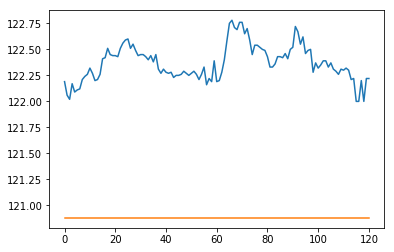

In [73]:
plt.plot(testY)
plt.plot(testPredict)


In [32]:
%matplotlib inline

In [33]:

# evaluating model

e = ta.Evaluate(h)
e.evaluate(X_train, y_train, folds=10, metric='metric='val_acc'')
ta.Deploy(h, 'out1');
## Restore model from zip file
i2 = ta.Restore('i2.zip')

## Predict the data using saved model
#trainPredict=i2.model.predict(trainX)
testPredict=i2.model.predict(testX)

SyntaxError: invalid syntax (<ipython-input-33-2a0136e39b6e>, line 5)